## Section A: Towards an Intuitive Understanding of Gaussian Process

Gaussian Process is a stochastic model that is a collection of random variables, any finite number of which have a joint Gaussian distribution.

In this section, we will go through a series of exercises to reinforce the ideas of 

1. 1D Gaussian Distribution
2. Multivariate Gaussian Distribution 
3. The Covariance Matrix
4. Marginalisation
5. Probablistic Conditioning

To obtain an intuition on what a Gaussian Process is and how they are derived.


### Importing relevant packages
(Feel free to import any packages you feel like needing to fully explore the content!)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import quad

### A1: 1D Normal (Gaussian) Distribution

In this workbook, we will use the example of chocolate egg measurements to help visualise and contextualise the concepts regarding Gaussian distributions. 

A Gaussian distribution is a considered a class of continous probability distribution with the probability density function defined only with the mean and standard deviation with the following form. Observe that the PDF is normalised.

$$
p(x \mid \mu, \sigma) \;=\; \frac{1}{\sigma \sqrt{2\pi}}
\exp\!\Biggl(-\frac{(x - \mu)^2}{2\sigma^2}\Biggr)
$$

where: 
- $x$ is a random variable  
- $\mu$ is the mean  
- $\sigma$ is the standard deviation

#### Excersise A1_1: 
##### Concepts: Defining functions
Write a function for the probability density dunction (PDF) for a Gaussian Distribution that returns p(x) with the mean and standard deviation as inputs. 

```python
def pdf_normal_1D(x, mean, std_deviation):
    ...
    return(normalisation_constant*gaussian_density)
```

You can access the required constants via the numpy package: np.pi and np.e

In [2]:
def pdf_normal_1D(x, mean, std_deviation):
    '''Univariate Gaussian distribution. '''
    gaussian_density = np.e**(-(x-mean)**2/(2*(std_deviation**2)))
    normalisation_constant = 1/(std_deviation*((2*np.pi)**0.5))
    return(normalisation_constant*gaussian_density)

#### Excersise A1_2: 
##### Concepts: Effect of Normalisation on PDF, plotting with matplotlib

Context: A chocolate factory makes chocolate eggs with a mean and stadard deviation of length of 30 cm $\pm$ 5 cm and a mean with of 20 cm $\pm$ 3 cm.

Using the PDF function you had previously written. Plot the probability density function of both the length and width. 

Given the normalisation, what should the area under the curve for each plot be? Verify that the plots have this area by integrating from $-\infty$ to $\infty$. One can perform intergration with the quad() function imported from scipy. See below for an example.

``` python
def quadratic(X, constant):
    return(X**2 + constant)

value, error = quad(func = lambda x: quadratic(X = x, constant = 5), a = -10, b = 10)
print(value) #output = 766.6667
```

Python Links/Concepts:
<a href="https://www.w3schools.com/python/python_lambda.asp ">Lambda functions </a>
; <a href="https://https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html">scipy.integration.quad documentation</a>


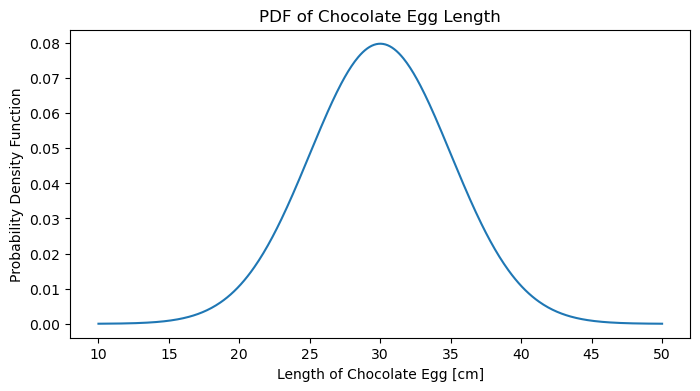

In [9]:
choco_length_mean = 30
choco_length_stddev = 5

x1_length_input = np.linspace (10,50,500)
ax = plt.figure(figsize = (8,4), dpi = 100)
plt.ylabel('Probability Density Function')
plt.xlabel('Length of Chocolate Egg [cm]')
plt.title('PDF of Chocolate Egg Length')
plt.plot(x1_length_input, pdf_normal_1D(x1_length_input,choco_length_mean, choco_length_stddev))
plt.show()

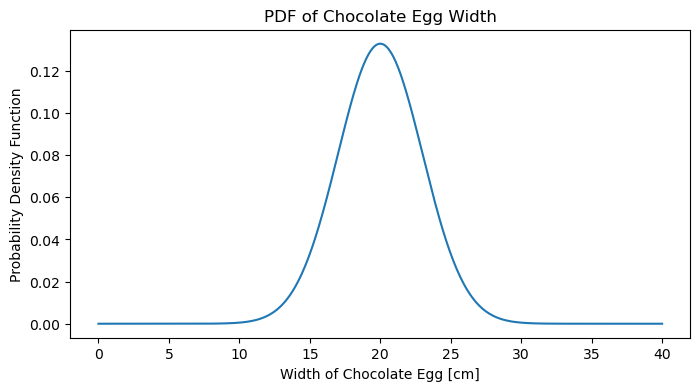

In [11]:
choco_width_mean = 20
choco_width_stddev = 3

x2_width_input = np.linspace (0,40,500)
ax = plt.figure(figsize = (8,4), dpi = 100)
plt.ylabel('Probability Density Function')
plt.xlabel('Width of Chocolate Egg [cm]')
plt.title('PDF of Chocolate Egg Width')
plt.plot(x2_width_input, pdf_normal_1D(x2_width_input,choco_width_mean, choco_width_stddev))
plt.show()

In [13]:
value, error = quad(lambda x: pdf_normal_1D(x, choco_length_mean, choco_length_stddev), -np.inf, np.inf)
print(value)
value, error = quad(lambda x: pdf_normal_1D(x, choco_width_mean, choco_width_stddev), -np.inf, np.inf)
print(value)

1.000000000000003
1.0000000000000002


#### Excersise A1_3: 
##### Concepts: Application of 1D Gaussian Distribution

Shop A only wants chocolate eggs with length of more than 21 cm. Shop B only wants chocolate eggs with wifth of more than 15 cm. If the factory can only sell to one of these shops, which deal would lead to less waste?

In [42]:
value, error = quad(lambda x: pdf_normal_1D(x, choco_length_mean, choco_length_stddev), 21, np.inf)
print('Wasted Eggs - length cutoff [%]: ', (1- value)*100)
value, error = quad(lambda x: pdf_normal_1D(x, choco_width_mean, choco_width_stddev), 15, np.inf)
print('Wasted Eggs - width cutoff [%]: ', (1- value)*100)

Wasted Eggs - length cutoff [%]:  3.593031911292477
Wasted Eggs - width cutoff [%]:  4.779035227281159


### A2: Multivariate Normal (Gaussian) Distribution

To obtain the PDF of a multivariate Gaussian distribution, we have to extend the definition of mean and standard deviation in the 1D case to the mean vector and covariance matrix in the multivariate case. The covariance matrix is a N x N matrix where N is the number of variables and includes the variance and covariance terms. Here, we term the variables as having a 'joint Gaussian Distribution'.

$$
p(\mathbf{x}\mid \boldsymbol{\mu}, \Sigma)
\;=\;
\frac{1}{\sqrt{(2\pi)^k\,\det(\Sigma)}}
\exp\!\Bigl(-\tfrac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^\top \,\Sigma^{-1}\,(\mathbf{x} - \boldsymbol{\mu})\Bigr)
$$

In 2 dimensions (x1 and x2 variables), the join Gaussian distribution can be written as the following: 
$$
p(x,y) \;=\;
\mathcal{N}\!\Bigl(
\underbrace{\begin{pmatrix}{x_1}\\[6pt]{x_2}\end{pmatrix}}_{\mathbf{x}};
\;
\underbrace{\begin{pmatrix}\mu_{x_1}\\[6pt]\mu_{x_2}\end{pmatrix}}_{\!\boldsymbol\mu},
\;
\underbrace{\begin{pmatrix}
\Sigma_{{x_1}} & \Sigma_{{x_1}{x_2}}\\[6pt]
\Sigma_{{x_2}{x_1}} & \Sigma_{x_2}
\end{pmatrix}}_{\Sigma}
\Bigr)
$$

where:

- $x$ is the random vector  
- $\mu$ is the mean vector  
- $\Sigma$ is the covariance matrix  
- $k$ is the dimensionality of $\mathbf{x}$  

#### Excersise A2_1: 
##### Concepts: Covariance Matrix

The length (x1) and width (x2) of the chocolate eggs have a mean vector and covarice matrix seen below.

``` python
mean_matrix = [[30, 20]]
covariance_matrix = [[25,2],
                     [2,9]]
```

What do the individual elements in the covariance matrix refer to? 

By observing the off diagonal elements, what association does the length of the chocolate egg have with its width? (ie, if a egg is found to have a larger length, is it more likely that the same egg has a smaller or larger width?) 

What if the the off-diagonal elements are negative or 0? 

To ponder: Why is the off-diagonal elements symmetrical?

In [43]:
# Off diagonal elements refer to the covariance(x_12 and x_21); diagonal elements refer to variance (x_1 and x_2) (same as standard deviation ** 2)
# Positive number in the off diagonal element (x_12 and x_21) means a positive association. An egg with a higher length has a greater probability of it having a greater width. 
# 0 for x_12 or x_21 will mean that the length and width are totally independant - picking an egg with a larger length does not mean an increased probability for a lower or higher width.
# Negative will mean that the length and width are negatively correlated.

#### Excersise A2_2: 
##### Concepts: Defining functions, matrix/tensor manipulation

Write a function for the probability density dunction (PDF) for a multivariate Gaussian Distribution that returns p(x) as a matrix with the x1 input space, x2 input space, mean_matrix and covariance_matrix as inputs. The final PDF would be a matrix with shape N x M where N and M is the respective numeber of points in the input space.

```python
def multivariate_2D_gauss_distribution(x1_input, x2_input, mean_vector, covariance_matrix):
    ...
    return(normalisation * exponential)
```

Hints: (There are many ways of implimenting this function, the hints below provide one of the many ways.) 
- The input space refers to the set of points which the Gaussian PDF is evaluated. For example, the input space for the length (x1 variable) could be 500 points from 10 to 50 and can be defined using the np.linspace() function.
```python 
x1 = np.linspace(10, 50, 500)
```
- To form a the random variable matrix from two independant arrays (x1 and x2), one can use the meshgrid and stack function as follows:
``` python
x1, x2     = np.meshgrid(x1_input, x2_input)
x1x2_input = np.stack([x1, x2], axis=-1)
x1x2       = np.asarray(x1x2_input)
```
- The inversion of a matrix can be obtained via the np.linalg.inv() function
- The number of dimensions of a vector can be obtained with the np.ndim() function
- $(\mathbf{x} - \boldsymbol{\mu})^\top \,\Sigma^{-1}\,(\mathbf{x} - \boldsymbol{\mu})$ can be performed with matrix multiplication - use @ instead of * for matric multiplication. However, this requires the precise manipulation of the matrixes to be in the correct shapce. One can also use the np.einsum() function. The syntax can be a little complicated, but the following can be used directly after obtaining the inverse covariance and difference in variable and mean matrices.
``` python
np.einsum ('...i, ij, ...j-> ...', difference, inv_cov_matrix, difference)
```


In [23]:
def multivariate_2D_gauss_distribution(x1_input, x2_input, mean_vector, covariance_matrix):
    x1, x2 = np.meshgrid(x1_input,x2_input)
    x1x2_input = np.stack([x1, x2], axis=-1)
    x1x2 = np.asarray(x1x2_input)
    mean_vector = np.asarray(mean_vector)
    covariance_matrix = np.asarray(covariance_matrix)

    dimentions = np.ndim (mean_vector)
    inv_cov_matrix = np.linalg.inv(covariance_matrix)

    difference = x1x2-mean_vector
    quadratic = np.einsum ('...i, ij, ...j-> ...', difference,inv_cov_matrix, difference)
    exponential = np.e**(-0.5*quadratic)

    normalisation = 1/( (2*np.pi)**(dimentions/2) * (np.linalg.det(covariance_matrix)**0.5))
    return(normalisation * exponential)

#### Excersise A2_3: 
##### Concepts: Plotting 3D

Using the function previously defined. Plot a 3d plot showing the joint Gaussian distribution between the length and width of the chocolate eggs.

``` python
mean_matrix = [[30, 20]]
covariance_matrix = [[25,5],
                     [5,9]]
```

<a href="https://matplotlib.org/stable/gallery/mplot3d/contourf3d_2.html#sphx-glr-gallery-mplot3d-contourf3d-2-py ">An example of 3D plotting can be observed here.  </a>




In [29]:
x1_length_input = np.linspace (10,50,500)
x2_width_input = np.linspace (0,40,500)
choco_mean = [[30, 20]]
choco_covarience_matrix = [[25,5],
                           [5,9]]
choco_2D_PDF = multivariate_2D_gauss_distribution(x1_length_input, x2_width_input, choco_mean, choco_covarience_matrix)

np.shape(choco_2D_PDF)

(500, 500)

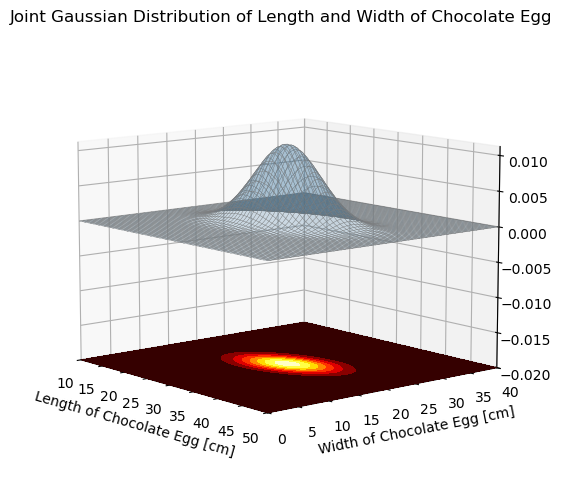

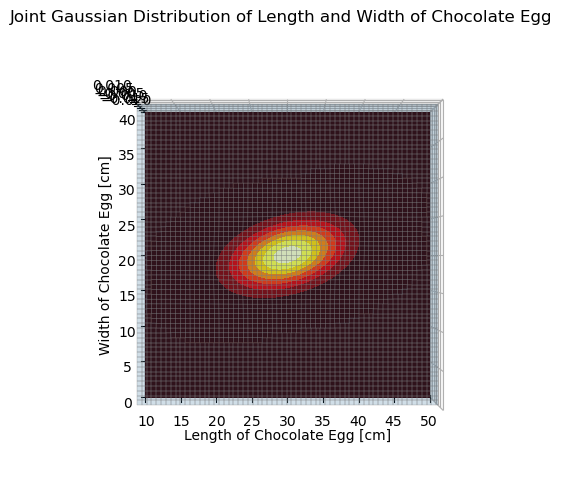

In [40]:
def plot_2D_guss_distribution(x1_input, x2_input, PDF, elevation = 10, azim = 320):

    x1, x2 = np.meshgrid(x1_input,x2_input)
    x1_max = max([max(c) for c in x1])
    x1_min = min([min(c) for c in x1])
    x2_max = max([max(c) for c in x2])
    x2_min = min([min(c) for c in x2])
    PDF_max = max([max(c) for c in PDF])
    
    ax = plt.figure(figsize = (6,6), dpi = 100).add_subplot(projection='3d')
    ax.plot_surface(x1, x2, PDF , edgecolor='grey', lw=0.2, rstride=8, cstride=8, alpha=0.2)
    ax.contourf(x1, x2, PDF, zdir='z', offset=-0.02, cmap='hot')
    
    ax.view_init(elev=elevation, azim=azim)
    ax.set(xlim=(x1_min, x1_max), ylim=(x2_min, x2_max), zlim=(-0.02,PDF_max), xlabel='Length of Chocolate Egg [cm]', ylabel='Width of Chocolate Egg [cm]')
    plt.title('Joint Gaussian Distribution of Length and Width of Chocolate Egg')
    plt.show()
    
plot_2D_guss_distribution(x1_length_input, x2_width_input, choco_2D_PDF)
plot_2D_guss_distribution(x1_length_input, x2_width_input, choco_2D_PDF, 90, 270)

#### Excersise A2_3:
##### Concepts: Covariance Matrix
Using the function previously defined. Plot a 3d plot showing the joint Gaussian distribution between the length and width of the chocolate eggs with the difference covarience matrix. What do each of the modifications result in/mean in terms of the assiciation between the two variabels? 

``` python
covariance_matrix = [[25,2],
                     [2,9]]
                     
covariance_matrix = [[25,0],
                     [0,9]]
                     
covariance_matrix = [[25,-5],
                     [-5,9]]
```

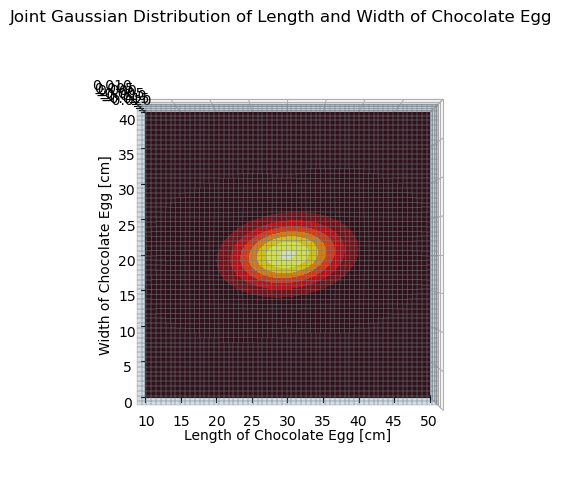

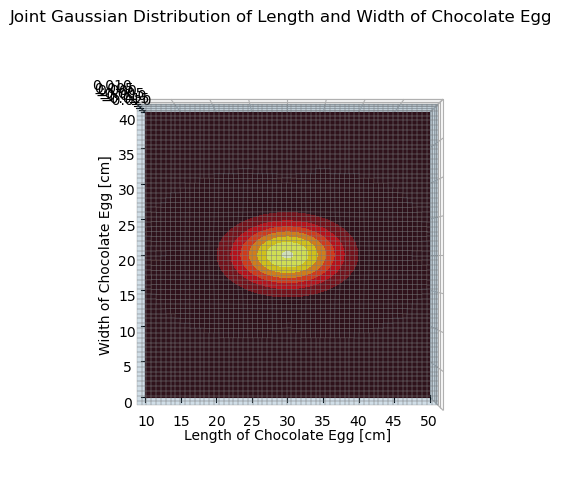

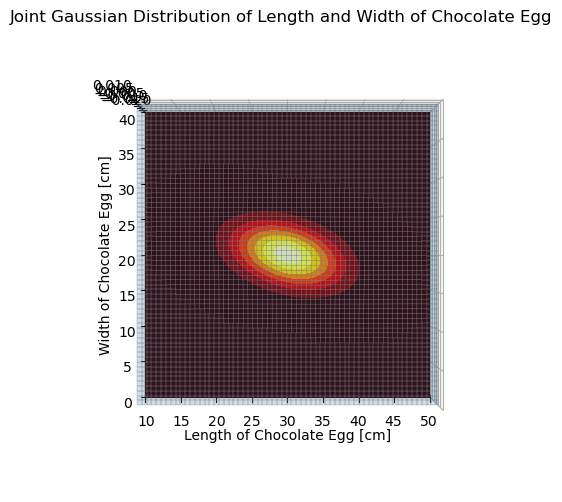

In [45]:
x1_length_input = np.linspace (10,50,500)
x2_width_input = np.linspace (0,40,500)
choco_mean = [[30, 20]]

choco_covarience_matrix = [[25,2],
                           [2,9]]
choco_2D_PDF = multivariate_2D_gauss_distribution(x1_length_input, x2_width_input, choco_mean, choco_covarience_matrix)
plot_2D_guss_distribution(x1_length_input, x2_width_input, choco_2D_PDF, 90, 270)

choco_covarience_matrix = [[25,0],
                           [0,9]]
choco_2D_PDF = multivariate_2D_gauss_distribution(x1_length_input, x2_width_input, choco_mean, choco_covarience_matrix)
plot_2D_guss_distribution(x1_length_input, x2_width_input, choco_2D_PDF, 90, 270)

choco_covarience_matrix = [[25,-5],
                           [-5,9]]
choco_2D_PDF = multivariate_2D_gauss_distribution(x1_length_input, x2_width_input, choco_mean, choco_covarience_matrix)
plot_2D_guss_distribution(x1_length_input, x2_width_input, choco_2D_PDF, 90, 270)

### A3: Properties of Multivariate Normal (Gaussian) Distribution (Marginalisation and Conditional Probability) 

#### Marginalisation
We can obtain the PDF function of each variable independantly via marginalisation. 

$$
p({x_1}) \;=\; \int p({x_1}, {x_2})\,\mathrm{d}{x_2}
$$
or 
$$
p({x_2}) \;=\; \int p({x_2}, {x_1})\,\mathrm{d}{x_1}
$$
The variable (ex. ${x_1}$) that is 'summed over' to obtain the PDF for ${x_2}$ a is said to be 'marginalised out'. 

An implimentation of marginalisation given a mean vector and a covariance matrix is as follows. Here, x1 is 'marginalised out'. 
```python
def marginalisation_2D(x1_input, x2_input, mean_vector, covariance_matrix, integral_lowerbound, integral_upperbound): 
    
    # to be compatible with the quad function(), 
    # the PDF function is wrapped under a joint‐PDF so it takes scalars instead of a matrix
    
    def joint_pdf(x1_input, x2_input):
        return multivariate_2D_gauss_distribution([x1_input], [x2_input], mean_vector, covariance_matrix)[0,0]       
    
    def marginal_x2(x2):
        val, _ = quad(lambda x1: joint_pdf(x1, x2), -np.inf, np.inf) #summing over all of x1
        return val
        
    # integrate the marginal over x2
    total_prob, _ = quad(marginal_x2, integral_lowerbound, integral_upperbound)
    print("Probability =", total_prob)
    return (total_prob)
```

#### Excersise A3_1: 
##### Concepts: Marginalisation

Using the pre-defined function for marginalisation, what is the percentage of chocolate eggs that has width of more than 24 cm?

``` python
x1_length_input = np.linspace (10,50,500)
x2_width_input = np.linspace (0,40,500)
mean_matrix = [[30, 20]]
covariance_matrix = [[25,5],
                     [5,9]]
```


In [48]:
def marginalisation_2D(x1_input, x2_input, mean_vector, covariance_matrix, integral_lowerbound, integral_upperbound): 
    
    # to be compatible with the quad function(), 
    # the PDF function is wrapped under a joint‐PDF so it takes scalars instead of a matrix
    
    def joint_pdf(x1_input, x2_input):
        return multivariate_2D_gauss_distribution([x1_input], [x2_input], mean_vector, covariance_matrix)[0,0]       
    
    def marginal_x2(x2):
        val, _ = quad(lambda x1: joint_pdf(x1, x2), -np.inf, np.inf) #summing over all of x1
        return val
        
    # integrate the marginal over x2
    total_prob, _ = quad(marginal_x2, integral_lowerbound, integral_upperbound)
    print("Probability =", total_prob *100, '%')
    return (total_prob)


x1_length_input = np.linspace (10,50,500)
x2_width_input = np.linspace (0,40,500)
mean_matrix = [[30, 20]]
covariance_matrix = [[25,5],
                     [5,9]]
marginalisation_2D(x1_length_input, x2_width_input,mean_matrix, covariance_matrix, 24, np.inf)

Probability = 9.121119831433605 %


0.09121119831433605

#### Excersise A3_2: 
##### Concepts: Marginalisation

With the understanding of how marginalisation_2D() function works, can you modify the function such that we can obtain the PDF for the length of the chocolate (${x_1}$ variable)? ie, to marginalise out ${x_2}$?

What is the percentage of chocolate eggs that has length of less than 24 cm?

In [52]:
def marginalisation_2D(x1_input, x2_input, mean_vector, covariance_matrix, integral_lowerbound, integral_upperbound): 
    
    # to be compatible with the quad function(), 
    # the PDF function is wrapped under a joint‐PDF so it takes scalars instead of a matrix
    
    def joint_pdf(x1_input, x2_input):
        return multivariate_2D_gauss_distribution([x1_input], [x2_input], mean_vector, covariance_matrix)[0,0]       
    
    def marginal_x1(x1):
        val, _ = quad(lambda x2: joint_pdf(x1, x2), -np.inf, np.inf) #summing over all of x2
        return val
        
    # integrate the marginal over x1
    total_prob, _ = quad(marginal_x1, integral_lowerbound, integral_upperbound)
    print("Probability =", total_prob *100, '%')
    return (total_prob)

x1_length_input = np.linspace (10,50,500)
x2_width_input = np.linspace (0,40,500)
mean_matrix = [[30, 20]]
covariance_matrix = [[25,5],
                     [5,9]]

marginalisation_2D(x1_length_input, x2_width_input,mean_matrix, covariance_matrix,-np.inf, 24)

Probability = 11.506967034999713 %


0.11506967034999713

#### Conditioning

We can obtain conditional probabilities via Baye's theorm which states that.
$$
P(A \mid B) \;=\; \frac{P(B \mid A)\,P(A)}{P(B)}
$$

$P(A \mid B)$
is the **posterior**. The probability of event A occuring given event B.

$P(B \mid A)$
is the **likelihood**. The probability of observing event B if event A is true.

$P(A)$
is the **prior**. The probability of event A.

$P(B)$
is the **marginal likelihood**. The total probability of observing event B under all possible circumstances of event (A).

We can condition a joint Gaussian distribution to obtain conditional probabilities. (ex. what is the probability of obtaining a egg with width of more than 24 cm if an egg of length 35 is chosen?)

The conditioned mean and variance can be obtained with the following relation.
$$
\begin{aligned}
p(\mathbf{x}_1\mid\mathbf{x}_2) &= \mathcal{N}\bigl(\mathbf{x}_1;\,\boldsymbol{\mu}_{x_1\mid x_2},\,\Sigma_{x_1\mid x_2}\bigr)\\[6pt]
\boldsymbol{\mu}_{x_1\mid x_2} &= \boldsymbol{\mu}_{x_1} \;+\;\Sigma_{x_1 x_2}\,\Sigma_{x_2}^{-1}\,(\mathbf{x}_2-\boldsymbol{\mu}_{x_2})\\[6pt]
\Sigma_{x_1\mid x_2} &= \Sigma_{x_1} \;-\;\Sigma_{x_1 x_2}\,\Sigma_{x_2}^{-1}\,\Sigma_{x_2 x_1}
\end{aligned}
$$

Notice that for the mean vector, the conditioned mean ${x_1}$ can be seen as a shift that is 
dependant on the extent to which ${x_2}$ deviates from the mean ($\mathbf{x}_2-\boldsymbol{\mu}_{x_2}$) scaled with the covariance $\Sigma_{{x_1}{x_2}}$.

Notice that for the convariance matrix, the $\Sigma_{x_1 x_2}\,\Sigma_{x_2}^{-1}\,\Sigma_{x_2 x_1}$ term is always more than 0 (given that the off-diagonal elements are non-zero). This means that the variance is always smaller after conditioning. Ie. knowing one variable gives us higher certainty of the spread of the other variable. This property forms the basis of Gausian Process regression!

#### Excersise A3_3: 
##### Concepts: Conditioning, matrix/tensor manipulation

Write a function for the conditioned mean vector. 

There are many ways of implimenting this function, the hints below provide one of the many ways.

Hints: 
- One can define a function with the mean vector, covariance matrix, conditioned variable index and conditioned value as inputs.
- The conditioned variable index (ie 0 for x1; 1 for x2; 2 for x3 ...) allows for an easier way to call upon the correct variable to condition on. 

```python
def choco_mean_conditional(mean_matrix, covariance_matrix, conditioned_index, conditioned_value):
    ...
    return (conditioned_mean)
```

- Some potentially useful functions.
- np.ix_() - this function constructs a an open mesh from various sequences
- np.transpose() - this function transposes a numpy matrix


In [53]:
def choco_mean_conditional(mean_matrix, covariance_matrix,conditioned_index, conditioned_value):
    working_indexlist = [i for i in range(covariance_matrix.shape[0])]
    working_indexlist.remove(conditioned_index)
    correction = covariance_matrix[np.ix_(working_indexlist,[conditioned_index])] * np.linalg.inv([[covariance_matrix[conditioned_index][conditioned_index]]]) * (conditioned_value-mean_matrix[0][conditioned_index])
    return (mean_matrix[np.ix_([0],working_indexlist)] + np.transpose(correction))


#### Excersise A3_4: 
##### Concepts: Conditioning, matrix/tensor manipulation

Write a function for the conditioned covariance matrix. 

There are many ways of implimenting this function, the hints below provide one of the many ways.

Hints: 
- One can define a function with the covariance matrix and the conditioned variable index.
- The conditioned variable index (ie 0 for x1; 1 for x2; 2 for x3 ...) allows for an easier way to call upon the correct variable to condition on. 

```python
def choco_cov_conditional(covariance_matrix, conditioned_index):
    ...
    return(conditioned_cov_matrix )
```

In [54]:
def choco_cov_conditional(covariance_matrix, conditioned_index):
    working_indexlist = [i for i in range(covariance_matrix.shape[0])]
    working_indexlist.remove(conditioned_index)
    correction = covariance_matrix[np.ix_(working_indexlist, [conditioned_index])] * np.linalg.inv([[covariance_matrix[conditioned_index][conditioned_index]]]) * covariance_matrix[np.ix_([conditioned_index], working_indexlist)]
    return(covariance_matrix[np.ix_(working_indexlist,working_indexlist)]-correction )

#### Excersise A3_5: 
##### Concepts: Conditioning, matrix/tensor manipulation

```python
choco_mean = [[30, 20]]
choco_covarience_matrix = [[25,5],
                           [5,9]]
```

Using your defined function, what is the mean and standard deviation of the length of a chocolate egg given that the chocolate egg has a width of 22 cm? We still obtain a Gaussian distribution as a result - observed the shift in mean values and the reduction in variance! 

Plot the 1D PDF of the length of chocolate egg prior to and after conditioning on the width of 22 cm. 

What is the probability of obtaining an egg with length more than 34 cm if a egg of width 22 cm is chosen?

In [67]:
choco_matrix_mean = np.asarray([[30,20]])
choco_covarience_matrix = np.asarray([[25,5],
                                      [5,9]])
mean_x1_givenx2 = choco_mean_conditional(choco_matrix_mean, choco_covarience_matrix, 1, 22)
cov_x1_givenx2 = choco_cov_conditional(choco_covarience_matrix, 1)
print('cond_mean:',mean_x1_givenx2)
print('cond_cov:',cov_x1_givenx2)

cond_mean: [[31.11111111]]
cond_cov: [[22.22222222]]


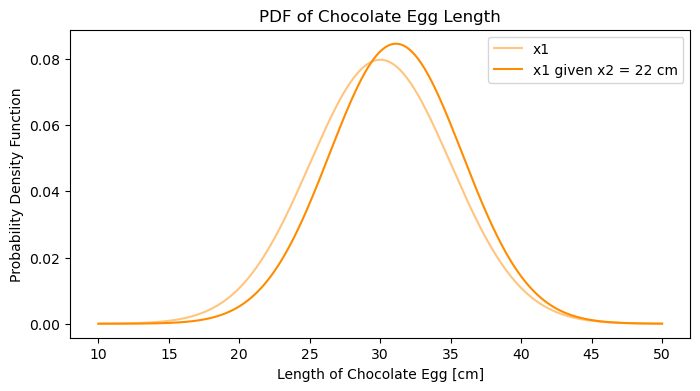

In [70]:
x1_length_input = np.linspace (10,50,500)
ax = plt.figure(figsize = (8,4), dpi = 100)
plt.ylabel('Probability Density Function')
plt.xlabel('Length of Chocolate Egg [cm]')
plt.title('PDF of Chocolate Egg Length')
plt.plot(x1_length_input, pdf_normal_1D(x1_length_input,choco_matrix_mean[0][0], choco_covarience_matrix[0][0]**0.5), alpha = 0.5, color = 'darkorange', label = 'x1')
plt.plot(x1_length_input, pdf_normal_1D(x1_length_input,mean_x1_givenx2[0][0], cov_x1_givenx2[0][0]**0.5), color = 'darkorange', label = 'x1 given x2 = 22 cm')
plt.legend()
plt.show()

In [78]:
value, error = quad(lambda x: pdf_normal_1D(x,mean_x1_givenx2[0][0], cov_x1_givenx2[0][0]**0.5), 34, np.inf)
print('Probability [%]: ', value*100)

Probability [%]:  26.99957393147796


#### Excersise A3_5: 
##### Concepts: Conditioning, matrix/tensor manipulation

```python
choco_mean = [[30, 20]]
choco_covarience_matrix = [[25,5],
                           [5,9]]
```

Using your defined function, what is the mean and standard deviation of the length of a chocolate egg given that the chocolate egg has a width of 22 cm? Observed the shift in mean values and the reduction in variance!

Plot the 1D PDF of the length of chocolate egg prior to and after conditioning on the width of 22 cm. 

What is the probability of obtaining an egg with length more than 34 cm if a egg of width 22 cm is chosen?

### A4: Deriving a Gaussian Process

A Gaussian process is 'collection of random variables, any finite number of which have a joint Gaussian distribution'. We will use the property of conditioning on joint Gaussian Distributions to intuitively show how Gaussian Process are derived. 

We first start by expanding our 2D joint gaussian distribution chocolate egg example into higher dimensions.

#### Excersise A4_1: 
##### Concepts: Conditioning

Let's expand our chocolate egg example by including an addiitonal variable ${x_3}$: thickness with a distribution of 7 cm $\pm$ 2 cm. The mean vector and covariance matrix is defined as follows.

```python
choco_matrix_mean = np.asarray([[30,20,7]])
choco_matrix_covariance = np.asarray([[25,5,3],
                                      [5,9,1],
                                      [3,1,4]])
```

Observe that we now have a 3 x 3 covarience matrix. What does the off diagonal elements represent? Why do we have N^2 number of elements where N is the number of variables in the covariance matrix? 

In [ ]:
#off diagonals are co-variances; diagonals are variances
#matrix is a symmetrical square with N x N elements where N is each dimension

#### Excersise A4_2: 
##### Concepts: Conditioning

Let's expand our chocolate egg example by including an addiitonal variable ${x_3}$: thickness with a distribution of 7 cm $\pm$ 2 cm. The mean vector and covariance matrix is defined as follows.

```python
choco_matrix_mean = np.asarray([[30,20,7]])
choco_matrix_covariance = np.asarray([[25,5,3],
                                      [5,9,1],
                                      [3,1,4]])
```
We now have a collection of 3 random variables (length, width and thickness). We will now condition on the length to show that we have a joint Gaussian distribution of the width and thickness.

Given an egg that has a length of 34 cm. What is the mean vector and covariance matrix of the width and thickness conditioned on the length? Ie. What is the joint gaussian distribution of width and thickness after conditioning? 

What is the difference in standard deviation for x2 and x3 before and after conditioning? Would you expect the decrease in standard deviation to be bigger for x2 or x3 - why? 

In [107]:
choco_matrix_mean = np.asarray([[30,20,7]])
choco_matrix_covariance = np.asarray([[25,5,3],
                                      [5,9,1],
                                      [3,1,4]])
mean_x2x3_givenx1 = choco_mean_conditional(choco_matrix_mean, choco_matrix_covariance, 0, 34)
cov_x2x3_givenx1 = choco_cov_conditional(choco_matrix_covariance, 0)
print('cond_mean:',mean_x2x3_givenx1)
print('cond_cov:',cov_x2x3_givenx1)
print ('')
print('Reduction of standard deviation for x2 from ', 3, ' to ', cov_x2x3_givenx1[0][0]**0.5)
print('Reduction of standard deviation for x3 from ', 2, ' to ', cov_x2x3_givenx1[1][1]**0.5)
print('Reduction in standard deviation should be bigger for x2 after conditioning as it as a higher covariance with x1.')

cond_mean: [[20.8   7.48]]
cond_cov: [[8.   0.4 ]
 [0.4  3.64]]

Reduction of standard deviation for x2 from  3  to  2.8284271247461903
Reduction of standard deviation for x3 from  2  to  1.9078784028338913
Reduction in standard deviation should be bigger for x2 after conditioning as it as a higher covariance with x1.


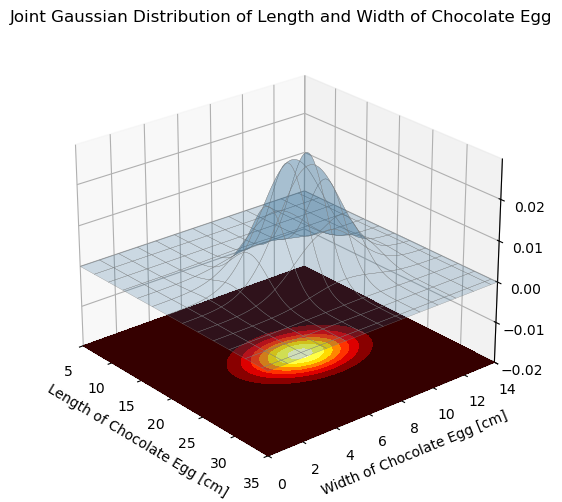

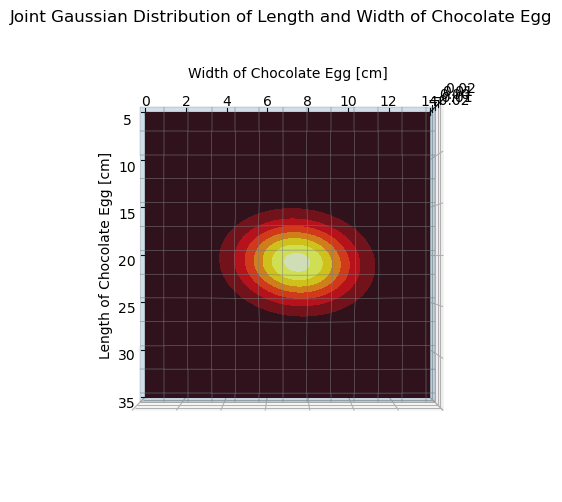

In [89]:
def plot_2D_guss_distribution(x1_input, x2_input, PDF, elevation = 25, azim = 320):

    x1, x2 = np.meshgrid(x1_input,x2_input)
    x1_max = max([max(c) for c in x1])
    x1_min = min([min(c) for c in x1])
    x2_max = max([max(c) for c in x2])
    x2_min = min([min(c) for c in x2])
    PDF_max = max([max(c) for c in PDF])
    
    ax = plt.figure(figsize = (6,6), dpi = 100).add_subplot(projection='3d')
    ax.plot_surface(x1, x2, PDF , edgecolor='grey', lw=0.2, rstride=8, cstride=8,
                    alpha=0.2)
    ax.contourf(x1, x2, PDF, zdir='z', offset=-0.02, cmap='hot')
    
    ax.view_init(elev=elevation, azim=azim)
    ax.set(xlim=(x1_min, x1_max), ylim=(x2_min, x2_max), zlim=(-0.02,PDF_max), xlabel='Length of Chocolate Egg [cm]', ylabel='Width of Chocolate Egg [cm]')
    plt.title('Joint Gaussian Distribution of Length and Width of Chocolate Egg')
    plt.show()
    
choco_2D_PDF = multivariate_2D_gauss_distribution(np.linspace(5,35,100), np.linspace(0,14,100), mean_x2x3_givenx1, cov_x2x3_givenx1)
plot_2D_guss_distribution(np.linspace(5,35,100), np.linspace(0,14,100), choco_2D_PDF)
plot_2D_guss_distribution(np.linspace(5,35,100), np.linspace(0,14,100), choco_2D_PDF,elevation = 90, azim = 0 )

#### Excersise A4_3: 
##### Concepts: Conditioning

We now have a collection of 3 random variables (length, width and thickness). We will now condition on the length and the thickness. 

Given an egg that has a length of 34 cm and a thickness of 5. What is the mean and standard deviation of the width conditioned on the length and thickness?

In [98]:
choco_matrix_mean = np.asarray([[30,20,7]])
choco_matrix_covariance = np.asarray([[25,5,3],
                                      [5,9,1],
                                      [3,1,4]])

mean_x2x3_givenx1 = choco_mean_conditional(choco_matrix_mean, choco_matrix_covariance, 0, 34)
cov_x2x3_givenx1 = choco_cov_conditional(choco_matrix_covariance, 0)

mean_x2_givenx1x3 = choco_mean_conditional(mean_x2x3_givenx1, cov_x2x3_givenx1, 1, 5)
cov_x2_givenx1x3 = choco_cov_conditional(cov_x2x3_givenx1, 1)

print('cond_mean:',mean_x2_givenx1x3)
print('cond_cov:',cov_x2_givenx1x3)
print ('')
print('Reduction of standard deviation for x2 from ', 3, ' to ', cov_x2_givenx1x3[0][0]**0.5, 'after conditioning on x1 and x3.')

cond_mean: [[20.52747253]]
cond_cov: [[7.95604396]]

Reduction of standard deviation for x2 from  3  to  2.820646017500948 after conditioning on x1 and x3.


#### Excersise A4_4: 
##### Concepts: Conditioning

We have now observed that a collection of 2 random variables from a joint Gaussian distribution of 3, resulted in a joint Gaussian distrubition of which the diagonal elements of the covarience matrix - the associated standard deviation - is reduced after conditioning. 

Hopefully, this now gives a little more intuition and meaning towards the definition of what a Gaussian Process is. To observe this in a format that is more akin to typical Gaussian Process plots, we will expand our 3 variable example to 6. Although doubled in the number of vairables, we will see how the process of conditioning is the same as before and will sill lead to a reduction in the covariance matrix each time the variables are conditioned.

We will first redo excersise A4_2 and A4_4 but with a different view. Here, code has been developed to show the gaussian distribution of each variable on a 2D plot. The axis is now inverted and the x axis is the PDF augement by a constant interval. Please run the code on a separate line. 

Observe the shift in mean and the reduction in standard deviation (small, but present here - we will see an example of a dramatic decrease in standard deviation from a higher covariance in the next example).

```python
def pdf_normal_1D(x, mean, std_deviation):
    '''Univariate Gaussian distribution. '''
    gaussian_density = np.e**(-(x-mean)**2/(2*(std_deviation**2)))
    normalisation_constant = 1/(std_deviation*((2*np.pi)**0.5))
    return(normalisation_constant*gaussian_density)
    
def choco_mean_conditional(mean_matrix, covariance_matrix,conditioned_index, conditioned_value):
    working_indexlist = [i for i in range(covariance_matrix.shape[0])]
    working_indexlist.remove(conditioned_index)
    correction = covariance_matrix[np.ix_(working_indexlist,[conditioned_index])] * np.linalg.inv([[covariance_matrix[conditioned_index][conditioned_index]]]) * (conditioned_value-mean_matrix[0][conditioned_index])
    return (mean_matrix[np.ix_([0],working_indexlist)] + np.transpose(correction))

def choco_cov_conditional(covariance_matrix, conditioned_index):
    working_indexlist = [i for i in range(covariance_matrix.shape[0])]
    working_indexlist.remove(conditioned_index)
    correction = covariance_matrix[np.ix_(working_indexlist, [conditioned_index])] * np.linalg.inv([[covariance_matrix[conditioned_index][conditioned_index]]]) * covariance_matrix[np.ix_([conditioned_index], working_indexlist)]
    return(covariance_matrix[np.ix_(working_indexlist,working_indexlist)]-correction )

space_input = np.linspace(0, 50, 200)
choco_matrix_mean = np.asarray([[30,20,7]])
choco_matrix_covariance = np.asarray([[25,5,3],
                                      [5,9,1],
                                      [3,1,4]])

ax = plt.figure(figsize = (12,4), dpi = 100)
plt.plot( pdf_normal_1D(space_input,choco_matrix_mean[0][0], choco_matrix_covariance[0][0]**0.5), space_input, label = 'Length (x1) Distribution', alpha = 0.2)
plt.plot( pdf_normal_1D(space_input,choco_matrix_mean[0][1], choco_matrix_covariance[1][1]**0.5)+0.15,space_input, label = 'Width (x2) Distribution', alpha = 0.2)
plt.plot( pdf_normal_1D(space_input,choco_matrix_mean[0][2], choco_matrix_covariance[2][2]**0.5)+0.3,space_input, label = 'Thickness (x3) Distribution', alpha = 0.2)

mean_x2x3_givenx1 = choco_mean_conditional(choco_matrix_mean, choco_matrix_covariance, 0, 34)
cov_x2x3_givenx1 = choco_cov_conditional(choco_matrix_covariance, 0)
plt.scatter(0, 34, label = 'x1 - conditioned value', color = 'darkblue')
plt.plot(pdf_normal_1D(space_input, mean_x2x3_givenx1[0][0], cov_x2x3_givenx1[0][0]**0.5)+0.15, space_input, label = 'x2 given x1', color = 'darkorange', alpha = 1)

mean_x2_givenx1x3 = choco_mean_conditional(mean_x2x3_givenx1, cov_x2x3_givenx1, 1, 5)
cov_x2_givenx1x3 = choco_cov_conditional(cov_x2x3_givenx1, 1)
plt.scatter(0.3, 5, label = 'x3 - conditioned value', color = 'green')
plt.plot(pdf_normal_1D(space_input, mean_x2_givenx1x3[0][0], cov_x2_givenx1x3[0][0]**0.5)+0.15, space_input, label = 'x2 given x1 and x3', color = 'black')

plt.gca().tick_params(axis='x',label1On=False)
plt.ylabel('Measurement [cm]')
plt.title('Distributions of various Chocolate Egg Measurements after conditioning on x1 and x3')
plt.legend()
plt.show()
```

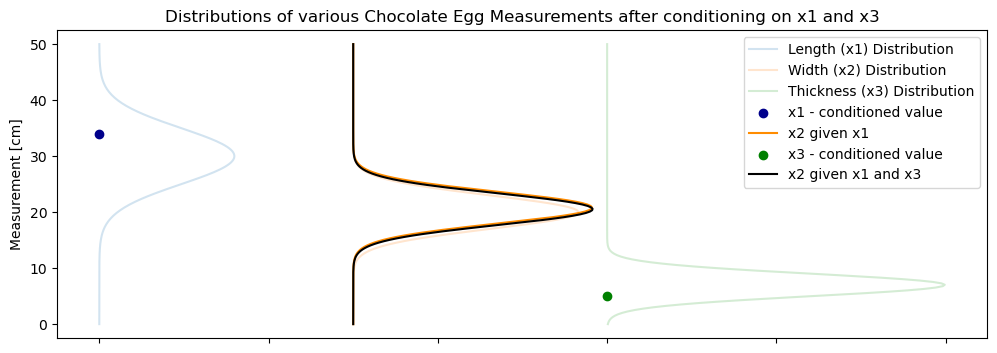

In [138]:
def pdf_normal_1D(x, mean, std_deviation):
    '''Univariate Gaussian distribution. '''
    gaussian_density = np.e**(-(x-mean)**2/(2*(std_deviation**2)))
    normalisation_constant = 1/(std_deviation*((2*np.pi)**0.5))
    return(normalisation_constant*gaussian_density)

def choco_mean_conditional(mean_matrix, covariance_matrix,conditioned_index, conditioned_value):
    working_indexlist = [i for i in range(covariance_matrix.shape[0])]
    working_indexlist.remove(conditioned_index)
    correction = covariance_matrix[np.ix_(working_indexlist,[conditioned_index])] * np.linalg.inv([[covariance_matrix[conditioned_index][conditioned_index]]]) * (conditioned_value-mean_matrix[0][conditioned_index])
    return (mean_matrix[np.ix_([0],working_indexlist)] + np.transpose(correction))

def choco_cov_conditional(covariance_matrix, conditioned_index):
    working_indexlist = [i for i in range(covariance_matrix.shape[0])]
    working_indexlist.remove(conditioned_index)
    correction = covariance_matrix[np.ix_(working_indexlist, [conditioned_index])] * np.linalg.inv([[covariance_matrix[conditioned_index][conditioned_index]]]) * covariance_matrix[np.ix_([conditioned_index], working_indexlist)]
    return(covariance_matrix[np.ix_(working_indexlist,working_indexlist)]-correction )

space_input = np.linspace(0, 50, 200)
choco_matrix_mean = np.asarray([[30,20,7]])
choco_matrix_covariance = np.asarray([[25,5,3],
                                      [5,9,1],
                                      [3,1,4]])

ax = plt.figure(figsize = (12,4), dpi = 100)
plt.plot( pdf_normal_1D(space_input,choco_matrix_mean[0][0], choco_matrix_covariance[0][0]**0.5), space_input, label = 'Length (x1) Distribution', alpha = 0.2)
plt.plot( pdf_normal_1D(space_input,choco_matrix_mean[0][1], choco_matrix_covariance[1][1]**0.5)+0.15,space_input, label = 'Width (x2) Distribution', alpha = 0.2)
plt.plot( pdf_normal_1D(space_input,choco_matrix_mean[0][2], choco_matrix_covariance[2][2]**0.5)+0.3,space_input, label = 'Thickness (x3) Distribution', alpha = 0.2)

mean_x2x3_givenx1 = choco_mean_conditional(choco_matrix_mean, choco_matrix_covariance, 0, 34)
cov_x2x3_givenx1 = choco_cov_conditional(choco_matrix_covariance, 0)
plt.scatter(0, 34, label = 'x1 - conditioned value', color = 'darkblue')
plt.plot(pdf_normal_1D(space_input, mean_x2x3_givenx1[0][0], cov_x2x3_givenx1[0][0]**0.5)+0.15, space_input, label = 'x2 given x1', color = 'darkorange', alpha = 1)

mean_x2_givenx1x3 = choco_mean_conditional(mean_x2x3_givenx1, cov_x2x3_givenx1, 1, 5)
cov_x2_givenx1x3 = choco_cov_conditional(cov_x2x3_givenx1, 1)
plt.scatter(0.3, 5, label = 'x3 - conditioned value', color = 'green')
plt.plot(pdf_normal_1D(space_input, mean_x2_givenx1x3[0][0], cov_x2_givenx1x3[0][0]**0.5)+0.15, space_input, label = 'x2 given x1 and x3', color = 'black')

plt.gca().tick_params(axis='x',label1On=False)
plt.ylabel('Measurement [cm]')
plt.title('Distributions of various Chocolate Egg Measurements after conditioning on x1 and x3')
plt.legend()
plt.show()

### Excersise A4_6:
Concepts: Conditioning, Gaussian Process
We will now depart the example of chocolate eggs and expand our 3 random variable example to 6. Although doubled in the number of vairables, we will see how the process of conditioning is the same as before and will sill lead to a reduction in the covariance matrix each time the variables are conditioned.

Here is some code to visualise the 6 variable mean vector and 6 x 6 covariance matrix. In the style of excersise A4_5, determine the mean vector and covariance matrix after conditioning on x1 = 22 and x5 = 40. Plot the individual distributions as seen in A4_5. 

``` python
choco_matrix_mean = np.asarray([[30,20,7,35,42,50]])
choco_matrix_covariance = np.asarray([[25,    7,  3,   0.5, 15,  1],
                                      [7,     9,  1,  -3,  -2,   1],
                                      [3,     1,  4,   0.5, 1,   3],
                                      [0.5,  -3,  0.5, 4,   10, -2],
                                      [15,   -2,  1,   10,   36, 3],
                                      [1,     1,  3,  -2,   3,  9]])

space_input = np.linspace(0, 70, 200)

ax = plt.figure(figsize = (20,5), dpi = 100)
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][0], choco_matrix_covariance[0][0]**0.5), space_input, label = 'x1 Distribution', alpha = 0.5, color = 'red')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][1], choco_matrix_covariance[1][1]**0.5)+0.15,space_input, label = 'x2 Distribution', alpha = 0.5, color = 'darkorange')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][2], choco_matrix_covariance[2][2]**0.5)+0.3,space_input, label = 'x3 Distribution', alpha = 0.5, color = 'green')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][3], choco_matrix_covariance[3][3]**0.5)+0.45,space_input, label = 'x4 Distribution', alpha = 0.5, color = 'blue')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][4], choco_matrix_covariance[4][4]**0.5)+0.6,space_input, label = 'x5 Distribution', alpha = 0.5, color = 'purple')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][5], choco_matrix_covariance[5][5]**0.5)+0.75,space_input, label = 'x6 Distribution', alpha = 0.5, color = 'black')

plt.gca().tick_params(axis='x',label1On=False)
plt.ylabel('Measurement')
plt.title('Distributions of random variables')
plt.legend()
plt.show()
```

Observe the shift in mean and the reduction in standard deviation. Why do some standard deviation and mean shift more than other variables? What determines this? 

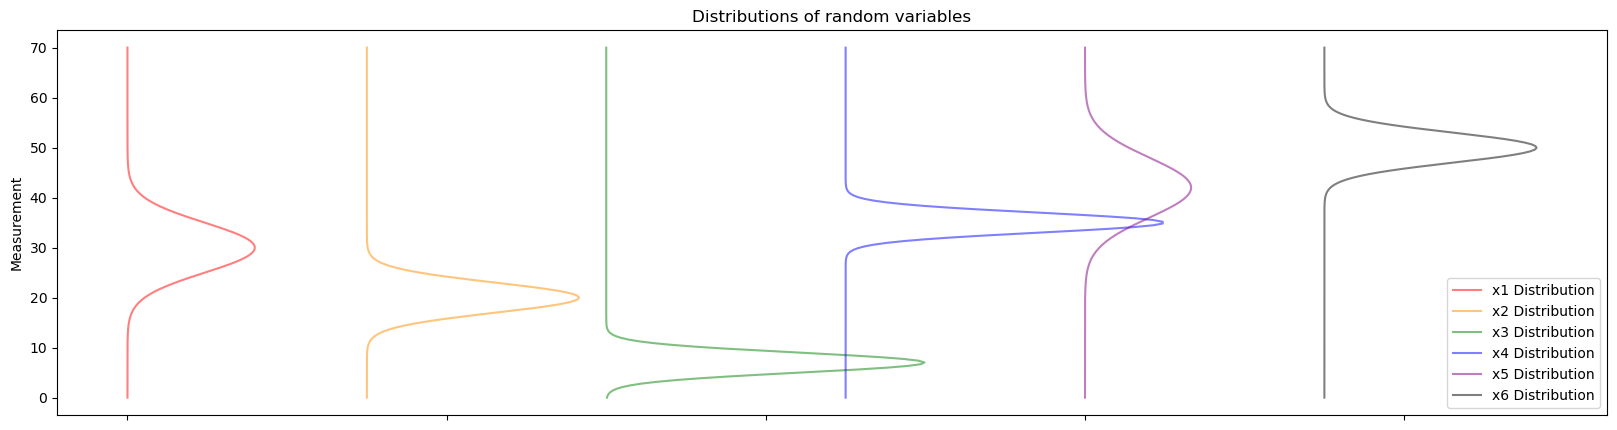

In [145]:
choco_matrix_mean = np.asarray([[30,20,7,35,42,50]])
choco_matrix_covariance = np.asarray([[25,    7,  3,   0.5, 15,  1],
                                      [7,     9,  1,  -3,  -2,   1],
                                      [3,     1,  4,   0.5, 1,   3],
                                      [0.5,  -3,  0.5, 4,   10, -2],
                                      [15,   -2,  1,   10,   36, 3],
                                      [1,     1,  3,  -2,   3,  9]])

space_input = np.linspace(0, 70, 200)

ax = plt.figure(figsize = (20,5), dpi = 100)
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][0], choco_matrix_covariance[0][0]**0.5), space_input, label = 'x1 Distribution', alpha = 0.5, color = 'red')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][1], choco_matrix_covariance[1][1]**0.5)+0.15,space_input, label = 'x2 Distribution', alpha = 0.5, color = 'darkorange')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][2], choco_matrix_covariance[2][2]**0.5)+0.3,space_input, label = 'x3 Distribution', alpha = 0.5, color = 'green')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][3], choco_matrix_covariance[3][3]**0.5)+0.45,space_input, label = 'x4 Distribution', alpha = 0.5, color = 'blue')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][4], choco_matrix_covariance[4][4]**0.5)+0.6,space_input, label = 'x5 Distribution', alpha = 0.5, color = 'purple')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][5], choco_matrix_covariance[5][5]**0.5)+0.75,space_input, label = 'x6 Distribution', alpha = 0.5, color = 'black')

plt.gca().tick_params(axis='x',label1On=False)
plt.ylabel('Measurement')
plt.title('Distributions of random variables')
plt.legend()
plt.show()

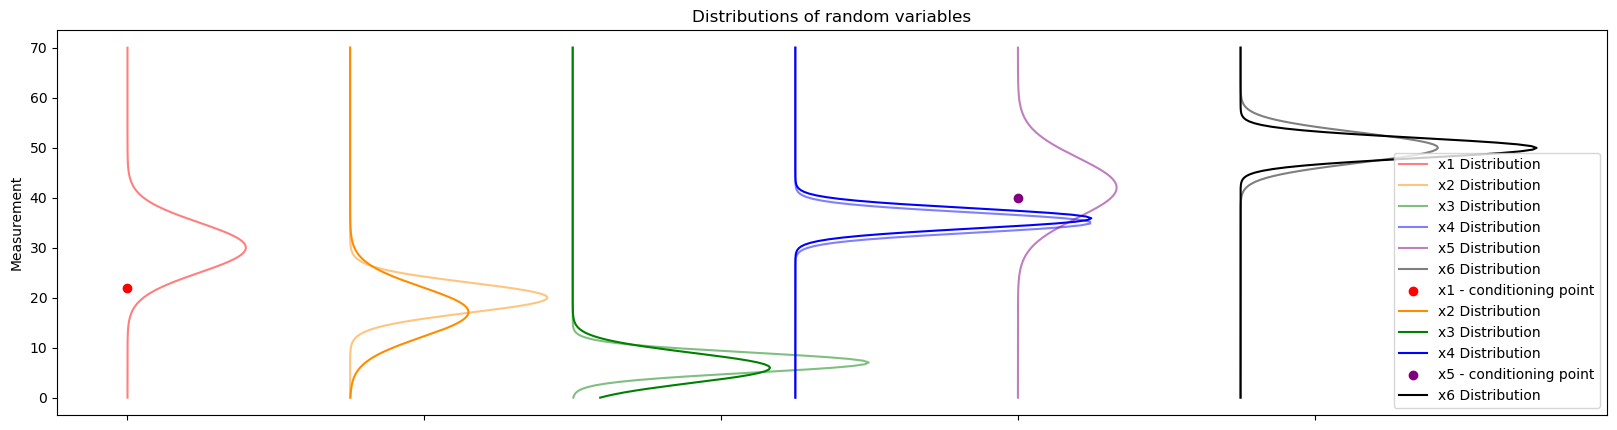

In [149]:
choco_matrix_mean = np.asarray([[30,20,7,35,42,50]])
choco_matrix_covariance = np.asarray([[25,    7,  3,   0.5, 15,  1],
                                      [7,     9,  1,  -3,  -2,   1],
                                      [3,     1,  4,   0.5, 1,   3],
                                      [0.5,  -3,  0.5, 4,   10, -2],
                                      [15,   -2,  1,   10,   36, 3],
                                      [1,     1,  3,  -2,   3,  9]])

space_input = np.linspace(0, 70, 200)

ax = plt.figure(figsize = (20,5), dpi = 100)
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][0], choco_matrix_covariance[0][0]**0.5), space_input, label = 'x1 Distribution', alpha = 0.5, color = 'red')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][1], choco_matrix_covariance[1][1]**0.5)+0.15,space_input, label = 'x2 Distribution', alpha = 0.5, color = 'darkorange')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][2], choco_matrix_covariance[2][2]**0.5)+0.3,space_input, label = 'x3 Distribution', alpha = 0.5, color = 'green')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][3], choco_matrix_covariance[3][3]**0.5)+0.45,space_input, label = 'x4 Distribution', alpha = 0.5, color = 'blue')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][4], choco_matrix_covariance[4][4]**0.5)+0.6,space_input, label = 'x5 Distribution', alpha = 0.5, color = 'purple')
plt.plot(pdf_normal_1D(space_input,choco_matrix_mean[0][5], choco_matrix_covariance[5][5]**0.5)+0.75,space_input, label = 'x6 Distribution', alpha = 0.5, color = 'black')


mean_givenx1 = choco_mean_conditional(choco_matrix_mean, choco_matrix_covariance, 0, 22)
cov_givenx1 = choco_cov_conditional(choco_matrix_covariance, 0)
mean_givenx1x5 = choco_mean_conditional(mean_givenx1, cov_givenx1 , 3, 40)
cov_givenx1x5 = choco_cov_conditional(cov_givenx1 , 3)

plt.scatter(0,22, label = 'x1 - conditioning point', alpha = 1, color = 'red')
plt.plot(pdf_normal_1D(space_input,mean_givenx1x5 [0][0], choco_matrix_covariance[0][0]**0.5)+0.15,space_input, label = 'x2 Distribution', alpha = 1, color = 'darkorange')
plt.plot(pdf_normal_1D(space_input,mean_givenx1x5 [0][1], choco_matrix_covariance[1][1]**0.5)+0.3,space_input, label = 'x3 Distribution', alpha = 1, color = 'green')
plt.plot(pdf_normal_1D(space_input,mean_givenx1x5 [0][2], choco_matrix_covariance[2][2]**0.5)+0.45,space_input, label = 'x4 Distribution', alpha = 1, color = 'blue')
plt.scatter(0.6,40, label = 'x5 - conditioning point', alpha = 1, color = 'purple')
plt.plot(pdf_normal_1D(space_input,mean_givenx1x5 [0][3], choco_matrix_covariance[3][3]**0.5)+0.75,space_input, label = 'x6 Distribution', alpha = 1, color = 'black')

plt.gca().tick_params(axis='x',label1On=False)
plt.ylabel('Measurement')
plt.title('Distributions of random variables')
plt.legend()
plt.show()

### Section A5: Segue into Gaussian Process Regression

Well done for getting through this section! 

We will go into Gaussian Process Regression next. This final section serves to highlight the difference between what we have done in the previous section (conditioning) and what GP regression would require. The image below shows an actual GP regression for an input x and a output y conditioned over training data marked with a cross with the predictive mean in black and the standard deviation filled in grey. This final excersise will ask you to think of as many possible differences and similarities between GP regressesion and the excersise we just completed in excersise A4_6. We will start the next section by reviewing this. 

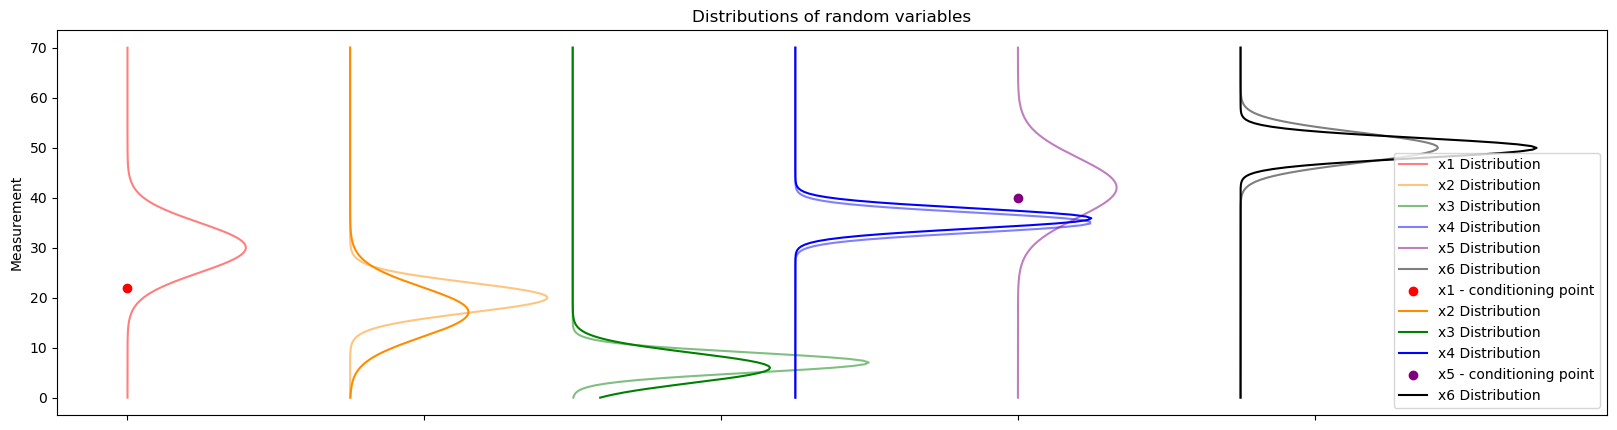

Gaussian Process Regession: 
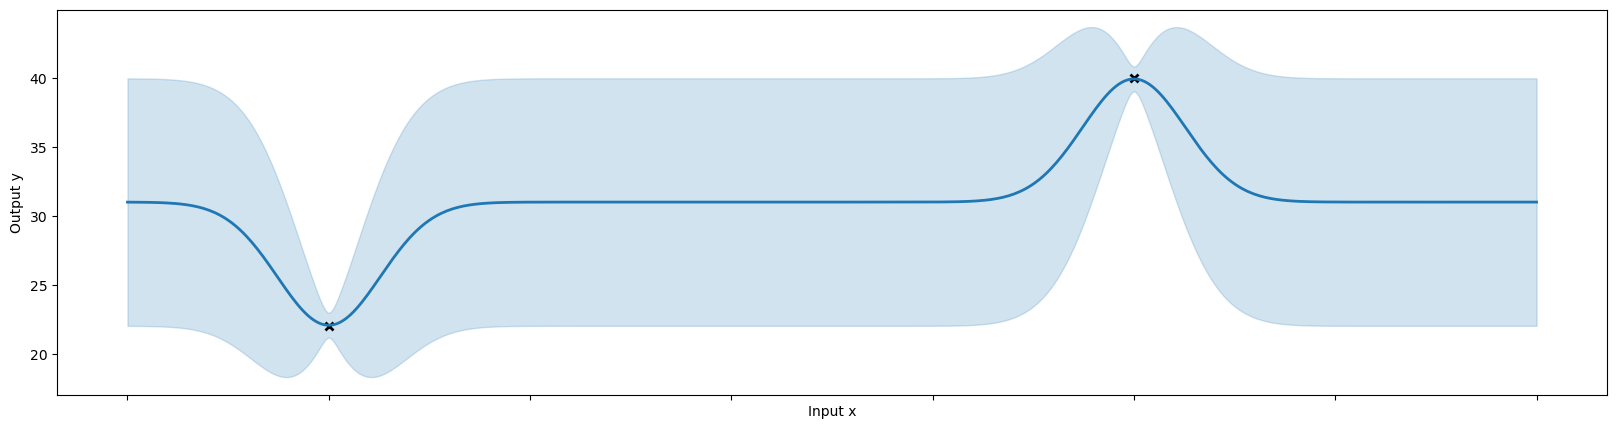